In [1]:
 #Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading dataset
train = pd.read_csv("/kaggle/input/brist1d/train.csv", low_memory=False)
test = pd.read_csv("/kaggle/input/brist1d/test.csv", low_memory=False)
sample = pd.read_csv("/kaggle/input/brist1d/sample_submission.csv", low_memory=False)

## Data Preprocessing Summary

### **1. Mapping `p_num` to Numeric Values**  
The `p_num` column, which contains categorical identifiers, is mapped to unique integer values. This makes the column suitable for machine learning models that require numerical input.

### **2. Dropping the id Column**
The id column, which serves as a unique identifier, is removed if it exists, as it does not provide predictive value for modeling.

### Purpose:
- Mapping p_num: Converts categorical data into a numerical format.
- Dropping id: Removes redundant columns that don't contribute to predictions.

In [3]:
# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(train['p_num'].unique())}

# Map p_num and process time directly
train['p_num'] = train['p_num'].map(mapping_dict)
# Drop the 'id' column if it exists
if 'id' in train.columns:
    train.drop(columns=['id'], inplace=True)

In [4]:
import pandas as pd

# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(test['p_num'].unique())}

# Map p_num and process time directly
test['p_num'] = test['p_num'].map(mapping_dict)


if 'id' in test.columns:
    test.drop(columns=['id'], inplace=True)

## Data Preprocessing 

### **1. Converting `time` to Datetime Format**  
The `time` column, which contains date and time information, is converted to the `datetime` format. This ensures that we can perform time-based operations such as extracting hours or calculating cyclical features. Invalid entries in the `time` column are converted to `NaT` (Not a Time) to prevent errors.

### **2. Creating Time-Based Features: `sin_hour` and `cos_hour`**  
To capture the cyclical nature of the hours in a day, two new features are created: `sin_hour` and `cos_hour`. These features are generated by applying sine and cosine transformations to the hour of the day. This encoding preserves the cyclical nature of time (i.e., 23:00 is close to 00:00).

### **3. Dropping the `time` Column**  
After generating the `sin_hour` and `cos_hour` features, the original `time` column is dropped, as the new features now encode the necessary time-related information for modeling.

### Purpose:
- Converting `time` to `datetime`: Allows for easy manipulation and extraction of time-based information.
- Creating `sin_hour` and `cos_hour`: Encodes the cyclical nature of time for better model performance.
- Dropping `time`: Removes redundant columns after transforming them into meaningful features.


In [5]:
# Ensure 'time' is in datetime format
train['time'] = pd.to_datetime(train['time'], errors='coerce')# Convert to datetime, invalid entries become NaT
test['time'] = pd.to_datetime(test['time'], errors='coerce')  # Apply to test as well

# Now you can safely use the .dt accessor
train["sin_hour"] = np.sin(np.pi * train['time'].dt.hour / 12)
train["cos_hour"] = np.cos(np.pi * train['time'].dt.hour / 12)

test["sin_hour"] = np.sin(np.pi * test['time'].dt.hour / 12)
test["cos_hour"] = np.cos(np.pi * test['time'].dt.hour / 12)


train = train.drop('time' , axis = 1)
test = test.drop('time' , axis = 1)

## Data Preprocessing Summary

### **1. Dropping Columns with High Percentage of Missing Values**  
A function `drop_columns_with_high_nan` is implemented to drop columns from the dataset that have more than a specified threshold (default 25%) of missing values. This step helps in cleaning the dataset by removing columns that are largely incomplete and may not contribute meaningfully to the model.

### **2. Function Details:**
- **Input:** 
    - The function takes the input DataFrame (`df`) and a threshold value to determine the percentage of missing values.
    - Default threshold is set to 25% (0.25).
- **Output:** 
    - It returns two objects: the cleaned DataFrame (with the problematic columns dropped) and a list of the column names that were dropped due to having too many missing value

### **3. Purpose:**
- Removing columns with a high percentage of missing values ensures that the model does not learn from incomplete or irrelevant data, improving overall performance and reducing noise.
- The `threshold` parameter can be adjusted depending on how strict you want to be regarding missing data.


In [6]:
def drop_columns_with_high_nan(df, threshold=0.5):
    """
    Drops columns from the DataFrame if they have more than a specified
    percentage of missing values and returns the names of these columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): The percentage threshold for missing values (default is 50%).

    Returns:
        tuple: 
            - pd.DataFrame: The DataFrame with columns having more than `threshold`% missing values dropped.
            - list: Names of the columns that were dropped.
    """
    # Calculate the threshold count for missing values
    missing_threshold = len(df) * threshold

    # Identify columns with more missing values than the threshold
    high_nan_columns = df.columns[df.isnull().sum() > missing_threshold].tolist()

    # Drop the identified columns
    cleaned_df = df.drop(columns=high_nan_columns)

    return cleaned_df, high_nan_columns

In [7]:
# Apply the function
train_cleaned, dropped_columns = drop_columns_with_high_nan(train, threshold=0.5)


print("\nDropped Columns:")
print(dropped_columns)

print("Cleaned DataFrame:")
train_cleaned.head()


Dropped Columns:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 'carbs-0:10', '

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,sin_hour,cos_hour
0,0,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,1.000000,6.123234e-17
1,0,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1.000000,6.123234e-17
2,0,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,1.000000,6.123234e-17
3,0,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,1.000000,6.123234e-17
4,0,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,0.965926,-2.588190e-01


## Data Preprocessing Summary

### **1. Applying Column Removal from Train to Test Data**  
The function `apply_column_removal_to_test` is designed to remove columns with a high percentage of missing values from the test data, based on the columns removed from the training data. This ensures consistency between the train and test datasets by keeping only the relevant features.

### **2. Function Details:**
- **Input:** 
    - The function accepts two DataFrames, `train_df` (training data) and `test_df` (test data), along with a threshold parameter to determine the percentage of missing values.
    - The default threshold is set to 25% (0.25).
- **Output:** 
    - The function returns two objects: the cleaned test DataFrame (with the same columns removed as in the training data) and a list of the columns that were dropped from the test data. 
### **3. Purpose:**
- This step ensures that the test data remains consistent with the train data by applying the same column removal logic to both datasets.
- The dropped columns are those that have more than the specified threshold percentage of missing values in the training data. These columns are also removed from the test set to maintain feature alignment.



In [8]:
def apply_column_removal_to_test(train_df, test_df, threshold=0.5):
    """
    Applies column removal based on NaN threshold from train data to test data.
    
    Parameters:
        train_df (pd.DataFrame): The training DataFrame.
        test_df (pd.DataFrame): The test DataFrame.
        threshold (float): The percentage threshold for missing values (default is 50%).

    Returns:
        tuple:
            - pd.DataFrame: Cleaned test DataFrame with columns dropped.
            - list: Names of the columns dropped from the test data.
    """
    # Drop columns in train data and get the names of dropped columns
    _, high_nan_columns_train = drop_columns_with_high_nan(train_df, threshold)

    # Remove the same columns from test data
    cleaned_test_df = test_df.drop(columns=high_nan_columns_train, errors='ignore')

    return cleaned_test_df, high_nan_columns_train

In [9]:
# Apply the function
test_cleaned, dropped_columns = apply_column_removal_to_test(train, test, threshold=0.5)



print("\nDropped Columns from Test Data:")
print(dropped_columns)

print("Cleaned Test DataFrame:")
test_cleaned.head()


Dropped Columns from Test Data:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,sin_hour,cos_hour
0,0,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,NaN,...,4.90,4.80,4.80,4.80,4.80,4.80,4.90,6.06,1.000000,6.123234e-17
1,0,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,9.1,...,9.70,13.92,16.22,16.69,23.12,30.51,24.57,32.43,0.258819,-9.659258e-01
2,0,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,NaN,...,9.98,25.24,12.27,6.83,6.53,7.97,19.76,10.16,-0.500000,-8.660254e-01
3,0,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,NaN,...,4.80,5.00,4.90,4.90,4.80,4.80,4.90,4.80,0.866025,5.000000e-01
4,0,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,12.2,...,4.80,4.80,4.90,4.80,4.80,4.80,4.80,4.80,0.866025,5.000000e-01


In [10]:
print("Updated df_train:",train_cleaned.shape)
print("Updated df_test:",test_cleaned.shape)

Updated df_train: (177024, 292)
Updated df_test: (3644, 291)


# Data Preprocessing Summary 

## 1. Handling Missing Values for Different Columns
The updated code handles missing values based on column types and their characteristics. Blood glucose (`bg-`) and heart rate (`hr`) columns are processed using **interpolation**, while columns related to `insulin`, `calories`, `steps`, and `carbs` are filled with `0`.

---

## 2. Functionality Breakdown

### For Blood Glucose (`bg-`) and Heart Rate (`hr`) Columns:
- **Missing values are filled using linear interpolation**. This method estimates missing values based on their neighboring observations within a row.
- Interpolation ensures a smooth and consistent representation of data trends, preserving logical continuity.
- **Interpolation is applied across rows (`axis=1`)**, meaning missing values are calculated horizontally for each individual data entry.
- This approach maintains the trend and avoids abrupt or unrealistic jumps in blood glucose and heart rate values.

---

### For Insulin, Calories, Steps, and Carbs Columns (`insulin`, `cals`, `steps`, `carbs`):
- **Missing values in these columns are replaced with `0`.**
- Filling with `0` reflects the assumption that missing data corresponds to no recorded activity, intake, or administration (e.g., no insulin or calorie intake).
- **Columns included:**
  - `insulin_cols`: Columns related to insulin levels.
  - `cals_cols`: Columns representing calorie data.
  - `steps_cols`: Columns containing step count data.
  - `carbs_cols`: Columns related to carbohydrate intake.

---

## 3. Purpose

### Blood Glucose and Heart Rate Data:
- Interpolation ensures that the data for `bg-` and `hr` columns is complete and continuous, suitable for analysis of trends or patterns over time.
- This method is especially appropriate for time-series or physiological data, where missing values are best estimated based on adjacent readings.

### Insulin, Calories, Steps, and Carbs Data:
- Filling with `0` ensures that these columns are ready for analysis without introducing artificial trends.
- The assumption of `0` for missing values simplifies preprocessing and is appropriate for contexts where the absence of data implies no corresponding activity or measurement.
fic trend or pattern.


In [11]:
# Define related column sets (bg_cols, insulin_cols, cals_cols, steps_cols, carbs_cols, hr_cols)
bg_cols = [col for col in train_cleaned.columns if col.startswith('bg-')]
hr_cols = [col for col in train_cleaned.columns if col.startswith('hr')]

carbs_cols = [col for col in test_cleaned.columns if col.startswith('carbs')]
insulin_cols = [col for col in test_cleaned.columns if col.startswith('insulin')]
steps_cols = [col for col in test_cleaned.columns if col.startswith('steps')]
cals_cols = [col for col in test_cleaned.columns if col.startswith('cals')]

In [12]:
# Combine all relevant columns
fill_zero_cols = carbs_cols + insulin_cols + steps_cols + cals_cols

# Fill missing values with 0 for these columns
train_cleaned[fill_zero_cols] = train_cleaned[fill_zero_cols].fillna(0)
test_cleaned[fill_zero_cols] = test_cleaned[fill_zero_cols].fillna(0)

In [13]:
time_series_cols = bg_cols + hr_cols



# Step 1: Linear interpolation for missing values in bg_cols and hr_cols
train_cleaned[time_series_cols] = train_cleaned[time_series_cols].interpolate(
    method='linear', axis=1, limit_direction='both')
test_cleaned[time_series_cols] = test_cleaned[time_series_cols].interpolate(
    method='linear', axis=1, limit_direction='both')

# Checking for Remaining Missing Values

After applying the missing value imputation strategies, we check if there are any remaining missing values in the `train_cleaned` and `test_cleaned` datasets.

## **Purpose of the Check:**
### **Objective:** 
The check ensures that all missing values have been handled effectively during the preprocessing steps.

### **Expected Result:** 
If no missing values remain, both outputs should print False, indicating that there are no missing values in the datasets.

### **If True:** 
If True is returned, there are still columns with missing values in the dataset, requiring further imputation or investigation.

In [14]:

print(train_cleaned.isnull().sum().any())

print(test_cleaned.isnull().sum().any())


False
False


## Extracting Specific Columns for Analysis

### **2. Purpose:**

#### **Identifying Relevant Columns:**

- **`past_hour_columns`:** Extracts columns that contain the prefix `"-0:"`, which likely represent the previous hour's data.
  
- **`columns_to_keep`:** Combines important features including:
  - **`p_num`:** Participant number (numeric).
  - **`sin_hour` & `cos_hour`:** Features representing the time of day, encoded using sine and cosine transformations to capture cyclical patterns in time.
  - **`bg+1:00`:** The target column, which likely represents the glucose measurement for the next hour.
  - **Past Hour Columns:** The columns that represent data from the previous hour(s), identified by the prefix `"-0:"`.One Hour DataOne Hour Ahead?**

The goal is to predict the glucose values one hour ahead. By including features such as the sine and cosine transformations of the hour, along with the data from the previous hour, the model can capture both the cyclical nature of time and the immediate past behavior of glucose measurements. Using data from just the past hour is sufficient to capture meaningful patterns and trends that help predict the next value. This approach keeps the model simple while effectively predicting the target.

### **3. Resulting DataFrame:**

The filtered DataFrame `train_df` now includes only the relevant columns for further analysis or model training. It contains the necessary information from the previous hour, participant number, time of day, and the target glucose measurement for the next hour.
model training.


In [15]:
# Extract past hour columns (prefix "0:")
past_hour_columns = [col for col in train_cleaned.columns if "-0:" in col]

# Include participant number (p_num), sin_hour, cos_hour, and target column (bg+1:00)
columns_to_keep = ['p_num', 'sin_hour', 'cos_hour', 'bg+1:00'] + past_hour_columns

# Filter the DataFrame
train_df = train_cleaned[columns_to_keep]

# Display the result
train_df.sample(2)

,p_num,sin_hour,cos_hour,bg+1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
62979,3,0.5,-0.866025,6.4,9.1,8.8,8.7,8.5,8.3,8.2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
158992,8,0.5,-0.866025,6.7,7.2,7.7,7.7,7.9,7.9,8.0,...,6.89,14.21,7.02,6.75,6.75,6.75,6.75,6.75,6.75,6.75


In [16]:
# Extract past hour columns (prefix "0:")
past_hour_columns = [col for col in test_cleaned.columns if "-0:" in col]

# Include participant number (p_num), sin_hour, cos_hour, and target column (bg+1:00)
columns_to_keep_in_test = ['p_num', 'sin_hour', 'cos_hour'] + past_hour_columns

# Filter the DataFrame
test_df = test_cleaned[columns_to_keep_in_test]

# Display the result
test_df.sample(2)

,p_num,sin_hour,cos_hour,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
3162,12,-0.866025,-0.5,12.133333,11.566667,11.0,10.200000,9.400000,8.6,8.000000,...,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.50,4.50
3138,12,0.866025,-0.5,14.500000,13.700000,12.9,11.766667,10.633333,9.5,9.283333,...,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,16.26,14.99


## Identifying Missing Columns Between Train and Test DataFrames

### **Purpose:**
Before training a model, it's important to ensure that the train and test datasets have the same columns. This section of the code helps identify any columns that are missing from either the training or the test set. 


In [17]:
# Identify missing columns in train compared to test
missing_in_train = set(test_df.columns) - set(train_df.columns)
print(f"Missing columns in train: {missing_in_train}")

# Identify missing columns in test compared to train
missing_in_test = set(train_df.columns) - set(test_df.columns)
print(f"Missing columns in test: {missing_in_test}")

Missing columns in train: set()
Missing columns in test: {'bg+1:00'}


## Checking for Missing Values in Train and Test DataFrames

### **Purpose:**
It is essential to verify whether there are missing values in both the training and test datasets before proceeding with model training. Missing values can affect model performance and should be handled appropriately.


In [18]:
# Check for missing values in train_filtered
missing_train = train_df.isnull().sum()
print("Missing values in train_filtered:")
print(missing_train[missing_train > 0])

# Check for missing values in test_df
missing_test = test_df.isnull().sum()
print("Missing values in test_df:")
print(missing_test[missing_test > 0])

# Summary
if missing_train.sum() == 0 and missing_test.sum() == 0:
    print("Both datasets are complete: No missing values.")
else:
    print("Missing values found. Please address them.")


Missing values in train_filtered:
Series([], dtype: int64)
Missing values in test_df:
Series([], dtype: int64)
Both datasets are complete: No missing values.


## Renaming Columns for Consistency

### **Purpose:**
The purpose of renaming the columns is to ensure consistency and avoid issues when working with certain characters that may not be compatible with some machine learning frameworks. In particular:
- Special characters like `:` and `-` may cause issues in column names.
- We keep the target column name unchanged to avoid any disruptions in target-related tasks.


In [19]:
# Define the target column name before renaming
target_column = 'bg+1:00'

# Sanitize only feature columns
train_df = train_df.rename(columns=lambda col: col if col == target_column else col.replace(':', '_').replace('-', '_'))
test_df = test_df.rename(columns=lambda col: col if col == target_column else col.replace(':', '_').replace('-', '_'))

# Verify that the target column name remains unchanged
print("Sanitized Train Columns:", train_df.columns.tolist())
print("Sanitized Test Columns:", test_df.columns.tolist())


Sanitized Train Columns: ['p_num', 'sin_hour', 'cos_hour', 'bg+1:00', 'bg_0_55', 'bg_0_50', 'bg_0_45', 'bg_0_40', 'bg_0_35', 'bg_0_30', 'bg_0_25', 'bg_0_20', 'bg_0_15', 'bg_0_10', 'bg_0_05', 'bg_0_00', 'insulin_0_55', 'insulin_0_50', 'insulin_0_45', 'insulin_0_40', 'insulin_0_35', 'insulin_0_30', 'insulin_0_25', 'insulin_0_20', 'insulin_0_15', 'insulin_0_10', 'insulin_0_05', 'insulin_0_00', 'hr_0_55', 'hr_0_50', 'hr_0_45', 'hr_0_40', 'hr_0_35', 'hr_0_30', 'hr_0_25', 'hr_0_20', 'hr_0_15', 'hr_0_10', 'hr_0_05', 'hr_0_00', 'cals_0_55', 'cals_0_50', 'cals_0_45', 'cals_0_40', 'cals_0_35', 'cals_0_30', 'cals_0_25', 'cals_0_20', 'cals_0_15', 'cals_0_10', 'cals_0_05', 'cals_0_00']
Sanitized Test Columns: ['p_num', 'sin_hour', 'cos_hour', 'bg_0_55', 'bg_0_50', 'bg_0_45', 'bg_0_40', 'bg_0_35', 'bg_0_30', 'bg_0_25', 'bg_0_20', 'bg_0_15', 'bg_0_10', 'bg_0_05', 'bg_0_00', 'insulin_0_55', 'insulin_0_50', 'insulin_0_45', 'insulin_0_40', 'insulin_0_35', 'insulin_0_30', 'insulin_0_25', 'insulin_0_20', 

## Grouping Related Columns

### **Purpose:**
The goal of this process is to group columns based on their type or category. This helps in organizing the data and allows for easier feature extraction or model building. The columns are grouped by their prefixes (e.g., `bg_`, `insulin`, `cals`), which are assumed to represent different types of measurements or features.

### **Code Explanation:**

1. **Identifying Column Sets:**
   - The `bg_cols`, `insulin_cols`, and `cals_cols` variables are lists that hold column names starting with specific prefixes. These prefixes are used to categorize the columns into different groups based on the type of data they contain.

   - **`bg_cols`**: Contains all columns that represent blood glucose levels (e.g., `bg_0_10`, `bg_0_15`).
   - **`insulin_cols`**: Contains columns that represent insulin levels.
   - **`cals_cols`**: Contains columns related to calorie intake or expenditure.
  
2. **Grouping Columns:**

The columns are then grouped into a list called `grouped_features`. Each group corresponds to one of the three categories (`bg_cols`, `insulin_cols`, `cals_cols`). 

For each group, the code finds the indices of the corresponding columns in `train_df` and stores them in `grouped_features`. This allows for easier handling of related columns, such as applying transformations or using them as features for modeling.

In [20]:
# Define related column sets (bg_cols, insulin_cols, etc.)
bg_cols = [col for col in train_df.columns if col.startswith('bg_')]
insulin_cols = [col for col in train_df.columns if col.startswith('insulin')]
cals_cols = [col for col in train_df.columns if col.startswith('cals')]
hr_cols = [col for col in train_df.columns if col.startswith('hr')]

# Add `p_num` for grouping purposes only
all_feature_cols = bg_cols + insulin_cols + cals_cols + hr_cols  # Features to use in modeling
grouped_features = []
for colset in [bg_cols, insulin_cols, cals_cols, hr_cols]:
    group_idxs = [idx for idx, col in enumerate(train_df.columns) if col in colset]
    grouped_features.append(group_idxs)



# Output grouped_features for verification
print("Grouped Features:")
for group_num, group in enumerate(grouped_features, start=1):
    print(f"Group {group_num}: {group}")

Grouped Features:
Group 1: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Group 2: [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Group 3: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Group 4: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [21]:
grouped_features = []
for colset in [bg_cols, insulin_cols, cals_cols, hr_cols]:
    group_idxs = [idx for idx, col in enumerate(train_df.columns) if col in colset]
    print(f"Indices for group {colset}: {group_idxs}")  # Print to verify the indices
    grouped_features.append(group_idxs)


Indices for group ['bg_0_55', 'bg_0_50', 'bg_0_45', 'bg_0_40', 'bg_0_35', 'bg_0_30', 'bg_0_25', 'bg_0_20', 'bg_0_15', 'bg_0_10', 'bg_0_05', 'bg_0_00']: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Indices for group ['insulin_0_55', 'insulin_0_50', 'insulin_0_45', 'insulin_0_40', 'insulin_0_35', 'insulin_0_30', 'insulin_0_25', 'insulin_0_20', 'insulin_0_15', 'insulin_0_10', 'insulin_0_05', 'insulin_0_00']: [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Indices for group ['cals_0_55', 'cals_0_50', 'cals_0_45', 'cals_0_40', 'cals_0_35', 'cals_0_30', 'cals_0_25', 'cals_0_20', 'cals_0_15', 'cals_0_10', 'cals_0_05', 'cals_0_00']: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Indices for group ['hr_0_55', 'hr_0_50', 'hr_0_45', 'hr_0_40', 'hr_0_35', 'hr_0_30', 'hr_0_25', 'hr_0_20', 'hr_0_15', 'hr_0_10', 'hr_0_05', 'hr_0_00']: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### **Inspecting the Shape of the DataFrames**

To understand the structure of the datasets, we print the shape of both the training and test DataFrames. The shape provides important information on the number of rows and columns in each dataset, helping us assess the size and completeness of the data before proceeding with any further analysis or modeling.


In [22]:
# Inspect the overall shape of the DataFrames
print("Overall Shapes:")
print(f"Train DataFrame Shape: {train_df.shape}")
print(f"Test DataFrame Shape: {test_df.shape}\n")

Overall Shapes:
Train DataFrame Shape: (177024, 52)
Test DataFrame Shape: (3644, 51)



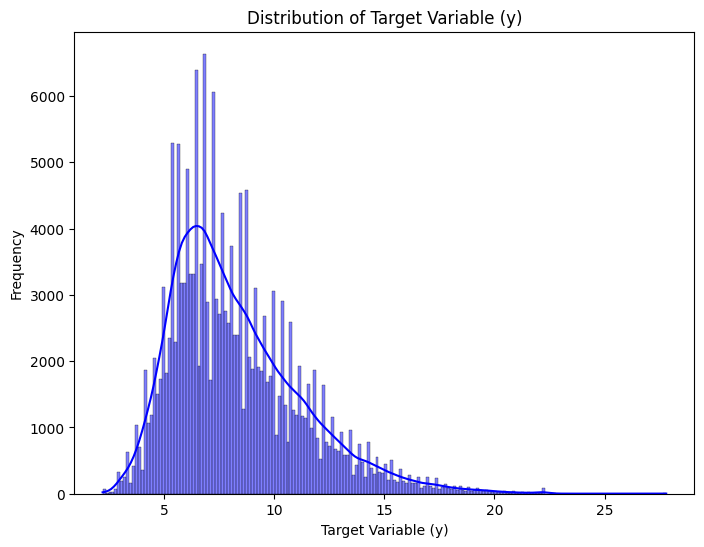

Skewness of Target Variable (y) before transformation: 1.07


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew 

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_df['bg+1:00'], kde=True, color='blue')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
skewness_value = skew(train_df['bg+1:00'])
print(f"Skewness of Target Variable (y) before transformation: {skewness_value:.2f}")

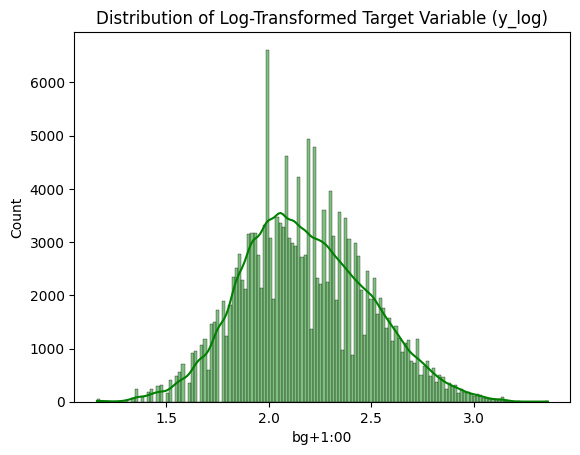

Skewness after Log Transformation: 0.21


In [24]:
# Log transformation
train_df['bg+1:00'] = np.log1p(train_df['bg+1:00'])

# Plot histogram of transformed target
sns.histplot(train_df['bg+1:00'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Target Variable (y_log)')
plt.show()

# Check skewness after transformation
log_skewness_value = skew(train_df['bg+1:00'])
print(f"Skewness after Log Transformation: {log_skewness_value:.2f}")


### **Splitting Data into Features and Target**

The first step in preparing the data for machine learning is separating the target variable (`bg+1:00`) from the features. The target variable represents the blood glucose measurement for the next hour, which we aim to predict. The remaining columns are used as the input features for the model.

#### **Code Explanation:**

1. **Separating Features and Target:**
   - `X`: This is the feature matrix created by dropping the target column (`bg+1:00`) and the participant number column (`p_num`) from the DataFrame.
   - `y`: This is the target vector, which contains the values from the `bg+1:00` column.

2. **Splitting the Data into Training and Validation Sets:**
   - The dataset is split into training and validation sets using `train_test_split` from `sklearn.model_selection`.
   - The `test_size=0.2` argument indicates that 20% of the data will be used for validation, while the remaining 80% will be used for training.
   - `random_state=42` ensures reproducibility of the split.

In [38]:
X = train_df.drop(['bg+1:00', 'p_num'], axis=1)
y = train_df['bg+1:00']
groups = train_df['p_num']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [39]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Apply the scaler to the features
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Verify the scaling
X_train_scaled[:2]


array([[ 0.35355339, -0.61237244, -0.31578947, -0.34210526, -0.36842105,
        -0.39473684, -0.42105263, -0.44736842, -0.47368421, -0.47368421,
        -0.5       , -0.52631579, -0.52631579, -0.48717949, -0.60556258,
        -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 ,
        -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 ,
         0.65865992, -0.29137116, -0.31205674, -0.24113475, -0.25886525,
        -0.24113475, -0.2155477 , -0.26501767, -0.2614841 , -0.2155477 ,
        -0.13427562, -0.15194346, -0.1024735 ,  0.25806452,  0.25723473,
         0.25806452,  0.25806452,  0.25396825,  0.25396825,  0.25806452,
         0.25396825,  0.25477707,  0.25806452,  0.25316456,  0.25396825],
       [ 0.61237244, -0.35355339,  0.        , -0.02631579, -0.05263158,
        -0.10526316, -0.07894737, -0.05263158, -0.07894737, -0.07894737,
        -0.13157895, -0.07894737, -0.13157895, -0.20512821,  0.65865992,
        -0.9216182 ,  0.3426043 ,  0.3426043 ,  4.

In [27]:
y

0         2.667228
1         2.624669
2         2.803360
3         2.760010
4         2.617396
            ...   
177019    2.493205
177020    2.476538
177021    2.459589
177022    2.442347
177023    2.415914
Name: bg+1:00, Length: 177024, dtype: float64

### **Inspecting the Shape of the Training and Validation Data**

After splitting the dataset into features (`X`) and target (`y`), and further dividing them into training and validation sets, it's important to verify the shape of the resulting datasets. This ensures that the split was performed correctly and that we have the expected number of samples in both sets.

#### **Code Explanation:**

The following code prints the shape of the training and validation data:

1. **Training Data (`X_train`):** This will contain 80% of the data for model training.
2. **Validation Data (`X_val`):** This will contain the remaining 20% of the data, which will be used for model evaluation.


In [28]:

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (141619, 50)
Validation data shape: (35405, 50)


-------

## tabNet Regressor

### **Cross-Validation with TabNet Regressor**

In this step, we use **GroupKFold** cross-validation to train and evaluate a **TabNet Regressor** model over 5 folds. The **TabNet** model is a deep learning model for tabular data that is effective for regression tasks. The key steps are:

1. **Cross-Validation Setup:**
   - The `GroupKFold` is used for splitting the data into 5 folds while ensuring that data from the same group (e.g., participant) does not appear in both the training and validation sets.
   - The `cv.split` method generates training and validation indices for each fold.

2. **Model Initialization:**
   - We initialize the **TabNet Regressor** model with the `grouped_features` argument, which organizes features into groups to help the model learn more effectively.

3. **Training and Validation:**
   - For each fold, the model is trained using the training data (`X_train`, `y_train`) and validated on the validation data (`X_valid`, `y_valid`).
   - The **root mean squared error (RMSE)** is used as the evaluation metric, and training stops early if the validation performance does not improve after 40 epochs (controlled by `patience=40`).

4. **Test Predictions:**
   - After training, the model is used to make predictions on the test data. These predictions are aggregated across all folds (by averaging) to generate the final predictions.

5. **Ensemble Predictions:**
   - The predictions from each fold are averaged to provide a final ensemble prediction, which helps reduce variance and improve accuracy.


In [29]:
!pip install -qq pytorch_tabnet

from pytorch_tabnet.tab_model import TabNetRegressor

In [30]:
# Define column groups for bg, insulin, and cals
bg_cols = [col for col in X.columns if col.startswith('bg_')]
hr_cols = [col for col in X.columns if col.startswith('hr')]
insulin_cols = [col for col in X.columns if col.startswith('insulin')]
cals_cols = [col for col in X.columns if col.startswith('cals')]

# Now update grouped_features based on the new set of columns after dropping 'p_num'
grouped_features = []
for colset in [bg_cols, insulin_cols, cals_cols, hr_cols]:
    group_idxs = [idx for idx, col in enumerate(X.columns) if col in colset]
    grouped_features.append(group_idxs)

# Output grouped_features for verification
print("Grouped Features:")
for group_num, group in enumerate(grouped_features, start=1):
    print(f"Group {group_num}: {group}")

Grouped Features:
Group 1: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Group 2: [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Group 3: [38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Group 4: [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [31]:
y

0         2.667228
1         2.624669
2         2.803360
3         2.760010
4         2.617396
            ...   
177019    2.493205
177020    2.476538
177021    2.459589
177022    2.442347
177023    2.415914
Name: bg+1:00, Length: 177024, dtype: float64

In [31]:

import pickle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GroupKFold
import numpy as np
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import RobustScaler

# Initialize cross-validation
cv = GroupKFold(5)

# Initialize lists to store evaluation metrics for each fold
r2_scores = []
mae_scores = []
rmse_scores = []

# Initialize RobustScaler for scaling features
#scaler = RobustScaler()

# Loop through each fold
for fold_num, (idx_train, idx_val) in enumerate(cv.split(X, y, groups=groups), 1):
    print(f"\nProcessing Fold {fold_num}...")
    
    # **Step 1: Split the data into training and validation sets**
    # Extract training data
    X_train = X.iloc[idx_train].to_numpy()  # Convert to numpy for compatibility
    y_train = y.iloc[idx_train].to_numpy().reshape(-1, 1)  # Reshape target to 2D
    
    # Extract validation data
    X_val = X.iloc[idx_val].to_numpy()  # Convert to numpy for compatibility
    y_val = y.iloc[idx_val].to_numpy().reshape(-1, 1)  # Reshape target to 2D

    # Debug prints to check shapes
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
    
    # **Step 2: Apply feature scaling using RobustScaler**
    # Fit the scaler on training data and transform both training and validation sets
    #X_train_scaled = scaler.fit_transform(X_train)  # Scale training data
    #X_val_scaled = scaler.transform(X_val)          # Scale validation data using same scaler

    
    # **Step 3: Check for GPU availability**
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # **Step 4: Initialize TabNet Regressor**
    reg = TabNetRegressor(
        grouped_features=grouped_features,  # Pass grouped feature indices
        verbose=50,
        device_name=device
    )
    
    # **Step 5: Train the model**
    # Train TabNet with early stopping and validation metrics
    reg.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric=['rmse'],
        batch_size=10000,
        patience=50,
        max_epochs=300,
        num_workers=4
    )
    
    # **Step 6: Make predictions on validation set**
    y_pred_val_log_tb = reg.predict(X_val)

    # **Step 7: Reverse log transformation for predictions and targets**
    # Ensure the log transformation is applied to y before the model training
    y_pred_val_tb = np.expm1(y_pred_val_log_tb)  # Reverse log transformation for predictions
    y_val_original = np.expm1(y_val)            # Reverse log transformation for actual target
    

    # **Step 8: Calculate evaluation metrics for this fold**
    rmse_val = np.sqrt(mean_squared_error(y_val_original, y_pred_val_tb))  # RMSE
    mae_val = mean_absolute_error(y_val_original, y_pred_val_tb)           # MAE
    r2_val = r2_score(y_val_original, y_pred_val_tb)                       # R²
    
    # Append the metrics to lists
    rmse_scores.append(rmse_val)
    mae_scores.append(mae_val)
    r2_scores.append(r2_val)

    # Save the trained model for this fold
    model_filename = f"model_fold_{fold_num}.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump(reg, f)
    
    # Print metrics for the current fold
    print(f"\nFold {fold_num} Evaluation Metrics:")
    print(f"Fold RMSE: {rmse_val:.4f}")
    print(f"Fold MAE: {mae_val:.4f}")
    print(f"Fold R²: {r2_val:.4f}")

# **Step 9: Calculate average metrics across all folds**
avg_r2 = np.mean(r2_scores)
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)

# Print average metrics
print(f"\nAverage Metrics Across 5 Folds:")
print(f"Average RMSE: {avg_rmse:.4f}")
print(f"Average MAE: {avg_mae:.4f}")
print(f"Average R²: {avg_r2:.4f}")



Processing Fold 1...
X_train shape: (150996, 50), y_train shape: (150996, 1)
X_val shape: (26028, 50), y_val shape: (26028, 1)
epoch 0  | loss: 0.54486 | val_0_rmse: 1.48814 |  0:00:06s
epoch 50 | loss: 0.04744 | val_0_rmse: 0.23174 |  0:05:27s
epoch 100| loss: 0.04626 | val_0_rmse: 0.2307  |  0:10:47s
epoch 150| loss: 0.04548 | val_0_rmse: 0.23047 |  0:16:05s

Early stopping occurred at epoch 176 with best_epoch = 126 and best_val_0_rmse = 0.22424

Fold 1 Evaluation Metrics:
Fold RMSE: 2.1921
Fold MAE: 1.6119
Fold R²: 0.5128

Processing Fold 2...
X_train shape: (142864, 50), y_train shape: (142864, 1)
X_val shape: (34160, 50), y_val shape: (34160, 1)
epoch 0  | loss: 0.56933 | val_0_rmse: 0.7522  |  0:00:06s
epoch 50 | loss: 0.04747 | val_0_rmse: 0.2288  |  0:05:24s
epoch 100| loss: 0.04605 | val_0_rmse: 0.22631 |  0:10:38s
epoch 150| loss: 0.04586 | val_0_rmse: 0.23011 |  0:15:50s

Early stopping occurred at epoch 163 with best_epoch = 113 and best_val_0_rmse = 0.22239

Fold 2 Evalu

---------

### Overall Performance:
### **Best Fold:**
Fold 4 performs the best overall with the highest R² (0.6000) and relatively low RMSE (2.0479), suggesting that it not only captures the most variance in the target variable but also predicts with reasonable accuracy.
### **Worst Fold:**
Fold 2 performs the worst, with the highest RMSE (2.2086) and lowest R² (0.4647), indicating that it struggles with both prediction accuracy and explaining the variance.
### **Average Performance:**
The average performance across the 5 folds indicates that the model is reasonably effective, but there is still room for improvement, especially in improving the generalization to unseen data (as reflected by the R² values).
### Conclusion:
**Fold 4** performs the best in terms of overall predictive accuracy and variance explanation, while **Fold 2** performs the worst. The model generally shows moderate performance, with improvements possible in areas like regularization or feature engineering to boost the R² and reduce the RMSE

Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...
Shape of mean_predictions: (35405, 1)
Shape of y_val_original: (35405,)

Averaged Model Validation Metrics:
RMSE: 2.0093
MAE: 1.4798
R²: 0.5536


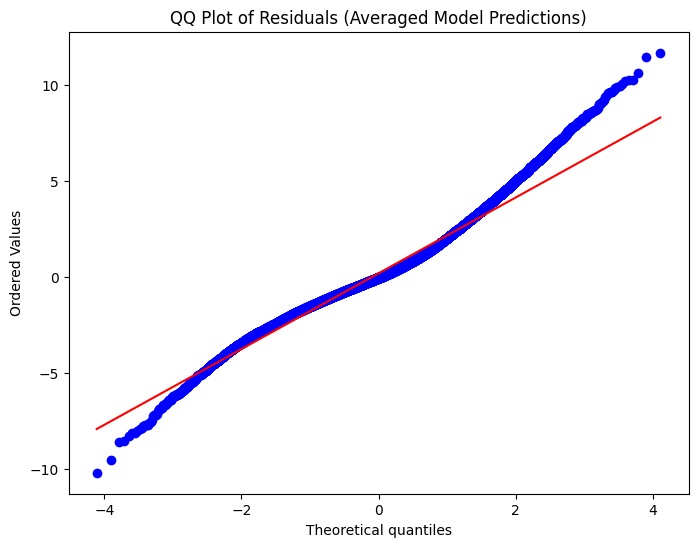

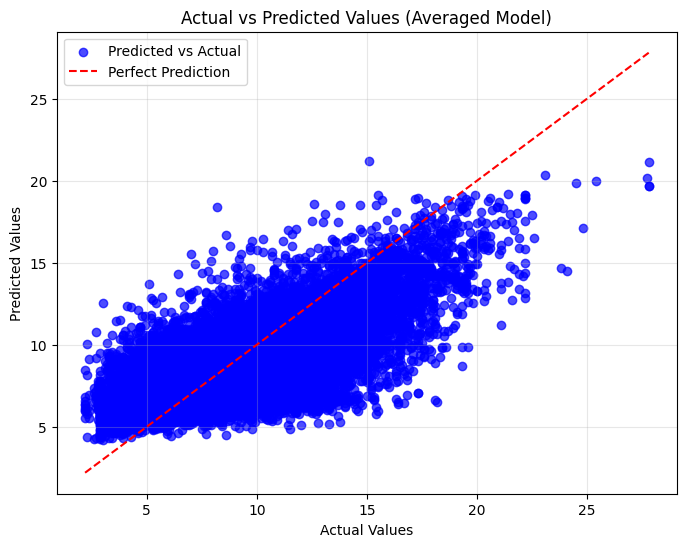

In [42]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import scipy.stats as stats
import os

# List to store predictions from each model
all_predictions = []

# Directory where models are stored
model_dir = '/kaggle/input/bris-tid-tabnet-regressor/'  # Correct path to input models folder

# Loop through all 5 folds to load the models and make predictions
for fold_num in range(1, 6):  # Assuming you have 5 folds
    print(f"Processing Fold {fold_num}...")
    
    # Construct the file path for the model
    model_filename = os.path.join(model_dir, f"model_fold_{fold_num}.pkl")  # Correct path
    
    # Check if the file exists before loading
    if os.path.exists(model_filename):
        with open(model_filename, 'rb') as f:
            model = pickle.load(f)
        
        # Convert X_val to numpy array if it's a pandas DataFrame (required for pytorch_tabnet)
        X_val_numpy = X_val.to_numpy()  # Convert pandas DataFrame to numpy array
        
        # Make predictions on the validation set for the current fold
        y_pred_val_log_tb = model.predict(X_val_numpy)  # Prediction on validation set
        y_pred_val_tb = np.expm1(y_pred_val_log_tb)  # Reverse log transformation
        
        # Append predictions for each fold to the list
        all_predictions.append(y_pred_val_tb)
    else:
        print(f"Model file {model_filename} not found.")

# Convert list of predictions into a numpy array and calculate the mean prediction across folds
mean_predictions = np.mean(all_predictions, axis=0)

# Print the shape of predictions and actual values to ensure they match
print(f"Shape of mean_predictions: {mean_predictions.shape}")
print(f"Shape of y_val_original: {y_val_original.shape}")

# Ensure that both are 1-dimensional arrays
if mean_predictions.ndim > 1:
    mean_predictions = mean_predictions.flatten()

if y_val_original.ndim > 1:
    y_val_original = y_val_original.flatten()

# Calculate evaluation metrics for the averaged predictions
rmse_val = np.sqrt(mean_squared_error(y_val_original, mean_predictions))  # RMSE
mae_val = mean_absolute_error(y_val_original, mean_predictions)           # MAE
r2_val = r2_score(y_val_original, mean_predictions)                       # R²

# Print the metrics for the averaged predictions
print(f"\nAveraged Model Validation Metrics:")
print(f"RMSE: {rmse_val:.4f}")
print(f"MAE: {mae_val:.4f}")
print(f"R²: {r2_val:.4f}")

# Plot QQ plot of residuals (difference between actual and predicted values)
residuals = y_val_original - mean_predictions

# Plot QQ plot to visualize normality of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals (Averaged Model Predictions)')
plt.show()

# Optionally, you can also plot the actual vs predicted values for visual inspection
plt.figure(figsize=(8, 6))
plt.scatter(y_val_original, mean_predictions, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_val_original.min(), y_val_original.max()], [y_val_original.min(), y_val_original.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs Predicted Values (Averaged Model)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend(loc='upper left')
plt.grid(alpha=0.3)
plt.show()


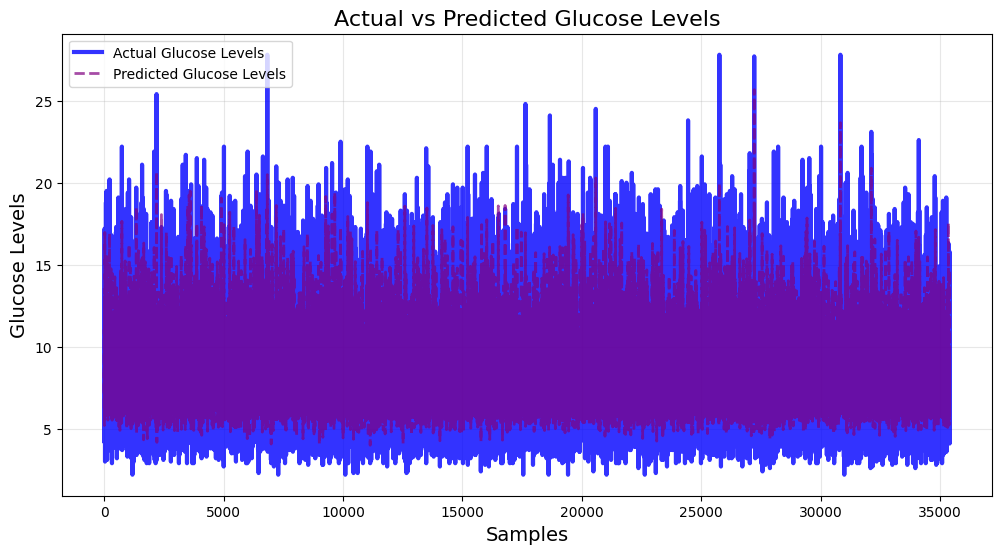

In [44]:
# Convert pandas Series to numpy array and flatten if necessary
y_val_original_np = y_val_original.to_numpy().flatten()  # Convert to numpy array and flatten
y_pred_val_tb_np = y_pred_val_tb.flatten()  # Convert predictions to numpy array and flatten

# Visualize Predictions with Adjusted Colors
plt.figure(figsize=(12, 6))

# Actual glucose levels with increased line width and a semi-transparent color
plt.plot(y_val_original_np, label='Actual Glucose Levels', color='blue', linestyle='-', linewidth=3, alpha=0.8)

# Predicted glucose levels with dashed line, different color, and semi-transparent
plt.plot(y_pred_val_tb_np, label='Predicted Glucose Levels', color='purple', linestyle='--', linewidth=2, alpha=0.7)

# Customize the plot
plt.title('Actual vs Predicted Glucose Levels', fontsize=16)
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Glucose Levels', fontsize=14)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()


## interference


In [49]:
import pickle
import numpy as np
import pandas as pd
# Drop the 'p_num' column from the test set
#test_df = test_df.drop('p_num', axis=1)
print(f"Test data shape after dropping 'p_num': {len(test_df)}")


# Convert to NumPy array if required
test_data = test_df.values


# List to store predictions for each fold
all_predictions = []

# Directory where models are stored
model_dir = '/kaggle/input/bris-tid-tabnet-regressor/'  # Correct path to input models folder

# Loop through all 5 folds to load the models and make predictions
for fold_num in range(1, 6):  # Assuming you have 5 folds
    print(f"Processing Fold {fold_num}...")
    
    # Construct the file path for the model
    model_filename = os.path.join(model_dir, f"model_fold_{fold_num}.pkl")  # Correct path
    
    # Check if the file exists before loading
    if os.path.exists(model_filename):
        with open(model_filename, 'rb') as f:
            model = pickle.load(f)
    # Make predictions on the test set for the current fold
    y_test_pred_log = model.predict(test_data)  # Prediction on the test set
    y_test_pred = np.expm1(y_test_pred_log)   # Reverse the log transformation to original scale
    
    # Append the predictions from this fold to the list
    all_predictions.append(y_test_pred)

# Convert the list of predictions into a numpy array and calculate the mean prediction for each sample
mean_predictions = np.mean(all_predictions, axis=0)

# Check the length of mean_predictions to make sure it matches sample['id']
print(f"Length of mean_predictions: {len(mean_predictions)}")
print(f"Length of sample['id']: {len(sample['id'])}")

# Ensure the mean predictions match the length of sample['id']
if len(mean_predictions) == len(sample['id']):
    # Create the submission DataFrame
    submission_df = pd.DataFrame({
        'id': sample['id'],  # Using the 'id' from the sample DataFrame
        'bg+1:00': mean_predictions.flatten()  # Mean predictions from all folds
    })

    # Display the first few rows of the submission DataFrame to verify
    print(submission_df.head())

    # Save the submission to a CSV file
    submission_df.to_csv('submission.csv', index=False)
    print(f'Submission file saved successfully.')
else:
    print(f"Error: The length of mean_predictions does not match the length of sample['id']")


Test data shape after dropping 'p_num': 3644
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...
Length of mean_predictions: 3644
Length of sample['id']: 3644
         id    bg+1:00
0  p01_8459   8.696195
1  p01_8460   5.760063
2  p01_8461   7.393454
3  p01_8462  10.511529
4  p01_8463   6.198765
Submission file saved successfully.
